In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import colors
from sklearn import linear_model

In [2]:
np.random.seed(1)
X = 1.5 * np.random.randn(100) + 10.5   # Array of 1000 values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(100)       # Generate 1000 residual terms
y = 20 + 0.3 * X  + res 

In [3]:
df = pd.DataFrame({'StudyTime': X,'Score': y})

In [4]:
df

,StudyTime,Score
0,12.936518,23.657391
1,9.582365,23.486963
2,9.707742,23.114069
3,8.890547,22.963953
4,11.798111,22.991978
...,...,...
95,10.616010,22.371084
96,9.984219,23.296425
97,10.565395,23.379760
98,9.569999,23.276475


In [5]:
max(X)


13.778363109799741

In [6]:
min(X)

7.047691954679576

In [7]:
max(y)

25.228858797424788

In [8]:
min(y)

21.57339618758479

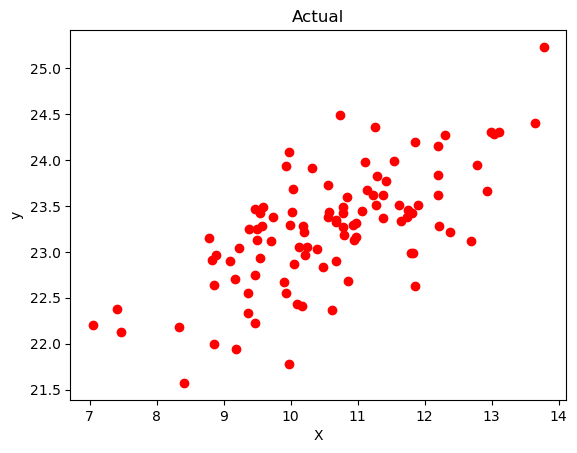

In [9]:
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [10]:
def loss_function(m1,m2,m3, b, points):
    total_error =0
    for i in range(len(points)):
        x=points.iloc[i].StudyTime
        yy=points.iloc[i].Score
        total_error += (yy-(m1*(x**3)+m2*(x**2)+m3*x+b))**2
    return total_error/ float(len(points))    
    
    

In [11]:
def gradient_descent(m1_now,m2_now,m3_now,b_now,points,L):
    m1_gradient =0
    m2_gradient =0
    m3_gradient =0
    b_gradient =0
    n=len(points)
    
    for i in range(n):
        x=points.iloc[i].StudyTime
        yy= points.iloc[i].Score
        
        m1_gradient += -(2/n)*(x**3)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        m2_gradient += -(2/n)*(x**2)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        m3_gradient += -(2/n)*(x)*(yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        
        b_gradient += -(2/n)* (yy-(m1_now*(x**3)+m2_now*(x**2)+m3_now*x+b_now))
        
    m1 = m1_now - m1_gradient *L
    m2 = m2_now - m2_gradient *L
    m3 = m3_now - m3_gradient *L
    b = b_now - b_gradient *L
    return m1,m2,m3,b
    

In [12]:
m1 =0
m2 =0
m3 =0
b =0

batchs=len(df)
batch_size=int(len(df)/float(batchs))

L=0.000000520 #try 0.008 and 0.009
epochs =50000

In [14]:
for i in range(epochs):
    if i% 500 == 0:
        print(f"Epoch: {i}")
        print(m1,m2,m3,b)
    for j in range(0,batchs):
         m1,m2,m3,b = gradient_descent(m1,m2,m3,b,df[j*batch_size:(j+1)*batch_size],L)
    
#print(m,b)

Epoch: 0
0 0 0 0
Epoch: 500
-0.03025923919341811 0.49703744946807094 0.11118041212599224 0.01866180653353385
Epoch: 1000
-0.030109625003038 0.4938472202811963 0.12816257435517459 0.023778502025035737
Epoch: 1500
-0.02996040493378747 0.49066539400067855 0.14510002158973745 0.028881608625425704
Epoch: 2000
-0.029811577947365515 0.48749194848836913 0.16199287164885476 0.03397116213996893
Epoch: 2500
-0.029663143008045335 0.4843268616619351 0.1788412420407955 0.03904719827951783
Epoch: 3000
-0.02951509908282905 0.4811701114972263 0.19564524996420696 0.044109752660833716
Epoch: 3500
-0.029367445141440882 0.47802167602812917 0.21240501230891942 0.04915886080683061
Epoch: 4000
-0.02922018015631982 0.47488153334640837 0.2291206456567842 0.054194558146822495
Epoch: 4500
-0.029073303102611827 0.4717496616015464 0.24579226628246922 0.05921688001677291
Epoch: 5000
-0.02892681295816367 0.468626039000606 0.2624199901542831 0.0642258616595391
Epoch: 5500
-0.02878070870351536 0.4655106438080724 0.2790

Epoch: 45000
-0.018375415497433184 0.24363474736401913 1.4601436598027557 0.4246793892319746
Epoch: 45500
-0.01825710537487195 0.2411119402027577 1.4735742218839565 0.42871675338992415
Epoch: 46000
-0.018139106891088996 0.23859577737240115 1.4869694270156806 0.43274337257394735
Epoch: 46500
-0.018021419224953136 0.23608624136592693 1.5003293683592909 0.4367592750958552
Epoch: 47000
-0.01790404155749644 0.2335833147224355 1.5136541388306801 0.4407644891928588
Epoch: 47500
-0.017786973071909597 0.2310869800270485 1.526943831100877 0.44475904302778296
Epoch: 48000
-0.017670212953534523 0.22859721991075405 1.5401985375968248 0.4487429646892274
Epoch: 48500
-0.017553760389860125 0.22611401705031636 1.553418350501866 0.4527162821917863
Epoch: 49000
-0.01743761457051636 0.22363735416814498 1.5666033617564834 0.456679023476233
Epoch: 49500
-0.017321774687268258 0.22116721403217426 1.5797536630588598 0.46063121640973215


In [15]:

ypred =m1*(X**3)+m2*(X**2)+ m3*X + b

In [16]:
z=loss_function(m1,m2,m3, b, df)
z

6.672133741916729

In [17]:
df.iloc[0].StudyTime


12.936518045494863

In [18]:
z= (df.iloc[0].StudyTime **3)*m1+(df.iloc[0].StudyTime **2)*m2 +df.iloc[0].StudyTime *m3+  b

z

20.42054508282617

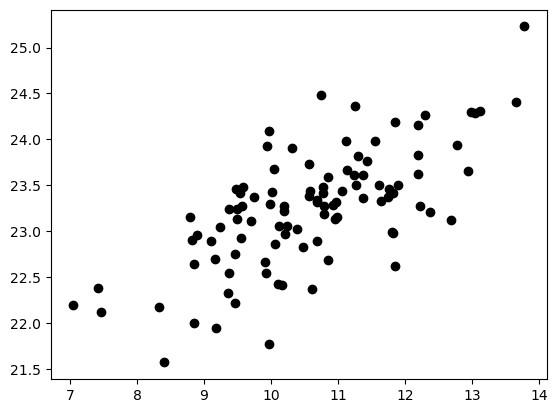

In [19]:
plt.scatter(df.StudyTime,df.Score,color="black")
#plt.plot(list(range(6,14)),[m*x+b for x in range(6,14)], color="red")
plt.show()

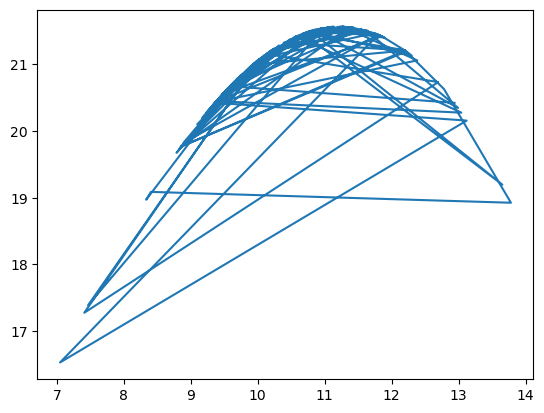

In [20]:
plt.plot(X, ypred)     # regression line
plt.show()

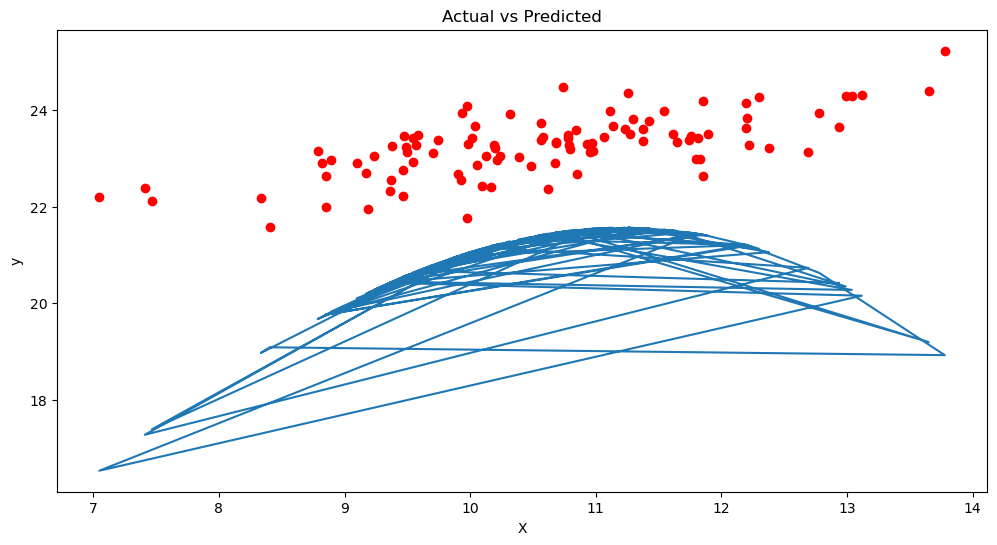

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.plot(X, ypred)     # regression line
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [22]:
def predict(value):
    #value = X
    for i in range(value):
        # straight line = m*x+y
       print(i, ':',df.iloc[i].StudyTime,':',df.iloc[i].Score,':', (df.iloc[0].StudyTime **3)*m1+(df.iloc[0].StudyTime **2)*m2 +df.iloc[0].StudyTime *m3+  b
,':',ypred[i])

In [23]:
predict(12)

0 : 12.936518045494863 : 23.65739113125546 : 20.42054508282617 : 20.42054508282617
1 : 9.582365379524887 : 23.486963466260214 : 20.42054508282617 : 20.670526351586723
2 : 9.707742371604816 : 23.114068532376844 : 20.42054508282617 : 20.797116914846505
3 : 8.890547066765745 : 22.96395338164826 : 20.42054508282617 : 19.82152689169833
4 : 11.798111443987018 : 22.991977510325583 : 20.42054508282617 : 21.44313133506198
5 : 7.047691954679576 : 22.198998802933204 : 20.42054508282617 : 16.5304317147921
6 : 13.11721764632472 : 24.305443519445554 : 20.42054508282617 : 20.155118015159363
7 : 9.358189648657346 : 22.330606593693233 : 20.42054508282617 : 20.42269205856805
8 : 10.978558644085648 : 23.160458340223883 : 20.42054508282617 : 21.54420504110109
9 : 10.125944436783884 : 23.054090604381845 : 20.42054508282617 : 21.154025256149957
10 : 12.693161905567461 : 23.12138991154686 : 20.42054508282617 : 20.731776949754497
11 : 7.409788935753519 : 22.380516376747202 : 20.42054508282617 : 17.27522466835